## Reading the data

In [1]:
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


df = pd.read_csv("../../corpus_sprint3_balanced_cp.csv", encoding="utf-8")
df = df.dropna()
print(df)
print(df.shape)

model = Doc2Vec.load("../../model_doc2vec_balanced_20epochs")

                                                Product  \
0             Payday loan, title loan, or personal loan   
1             Payday loan, title loan, or personal loan   
2                                 Vehicle loan or lease   
3     Money transfer, virtual currency, or money ser...   
4             Payday loan, title loan, or personal loan   
...                                                 ...   
9405                        Checking or savings account   
9406                            Bank account or service   
9407                            Bank account or service   
9408                            Bank account or service   
9409                            Bank account or service   

                           Consumer complaint narrative  
0     they would not let me pay my loan off 2 days b...  
1     service finance are liars and are charging me ...  
2     on xx/xx/ i signed a car loan agreement to fin...  
3     we hired and debt collection to handle collect...  
4

In [2]:
df_concat = model.docvecs.vectors_docs

## Applying T-SNE

In [3]:
tsne = TSNE(n_components=2)
data_reduced = tsne.fit_transform(df_concat)


In [4]:
print(data_reduced.shape)

(9410, 2)


## Applying k-means

In [5]:
from sklearn.cluster import KMeans
from sklearn import metrics

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


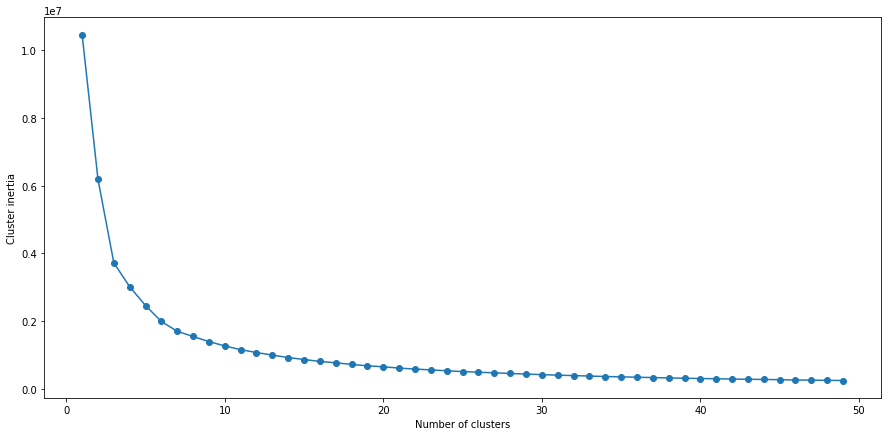

In [6]:
inertia = []
k_min=1
k_max=50
for i in range(k_min, k_max):
    print(i)
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(data_reduced)
    inertia.append(km.inertia_)
plt.rcParams['figure.figsize'] = [15,7]
plt.plot(range(k_min,k_max), inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia')
plt.show()

## Analyzing with narrative

In [10]:
number_clusters = 7
km = KMeans(n_clusters=number_clusters,init='k-means++')
indexes = km.fit_predict(data_reduced)
centroids = km.cluster_centers_

#v_df = pd.DataFrame(vectors)
df_result = pd.concat([df, pd.DataFrame(indexes)], axis = 1)
print(df_result)

                                                Product  \
0             Payday loan, title loan, or personal loan   
1             Payday loan, title loan, or personal loan   
2                                 Vehicle loan or lease   
3     Money transfer, virtual currency, or money ser...   
4             Payday loan, title loan, or personal loan   
...                                                 ...   
9405                        Checking or savings account   
9406                            Bank account or service   
9407                            Bank account or service   
9408                            Bank account or service   
9409                            Bank account or service   

                           Consumer complaint narrative  0  
0     they would not let me pay my loan off 2 days b...  4  
1     service finance are liars and are charging me ...  2  
2     on xx/xx/ i signed a car loan agreement to fin...  4  
3     we hired and debt collection to handle co

Cluster number: 0
in  an auto loan was taken out i found out through credit report and thorough .the car was registered in .bith states i don t live in or ever have.i showed police the id used after getting copy from dealer vs my license.this individual has a few social and id they have been using to obtain goods and services.i provided proof of residency to this company along with multiple police reports showing this was not my loan nor do i live where this took place. i do not have an account number.my last 4 of my social are 

xx/xx/ bank of america home loan letter from regarding my fact claims of fraudulent activity with countrywide america wholesaler 5 or 6 loans at a piece on my . on my not on anything . recorded at and courthouse locally new info as per countrywide loan app sent to me by boa and a boa note put against my home at by someone at nc all supposedly signed and effective on as per register office records and recently sent documents from boa and via email that i have o

on  i submitted a request for a credit line increase on my +13-year visa credit card with capital one bank virginia. today i received a letter in the u.s. mail also dated  that the increase request was declined stating the reason as " your financial obligations reported to us by the credit reporting agency are too high. the credit bureau file was cited as their information source. i accessed the credit bureau file. when two statistically minimal errors are corrected it indicates a 4.56 credit utilization rate on 320000.00 of available credit. such " financial obligations are not " too high but quite the opposite for too many individuals who maintain high credit card balances. when i called capital one s florida operation to protest the error stated in its decline reason i was told by supervisor that there was no recourse in fixing capital one s blatant error. when i asked for clarification of this statement they refused to provide it. when i called to capital one s headquarters i was t

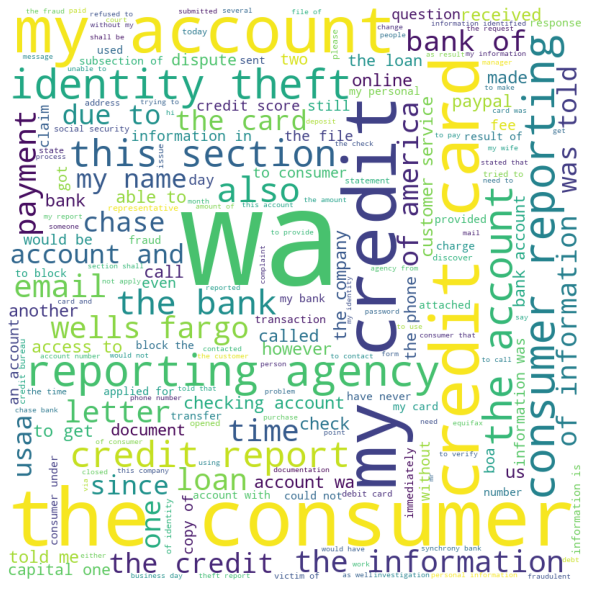

Cluster number: 1
they put a late on my credit for my car that the payment for  that was paid in full before the payment was due. they also had auto payment setup on account anyway never should have been late because if there was an amount past due they should have auto taking the ach. i am trying to close on my home and this is an issue.

this is not a duplicate. the company did not even address any part of this complaint the biggest joke of all is that i tried looking up and on my credit report are reporting that i owe them after paying on loan. this complaint is going to ca doj as well and this predatory loan i am they are just stealing money and ruining credit. i have filed complaint /dispute with as well. i belive this is going by a different name they did not respond to how i have paid them and owe them now. after i received a statement which was not sent until after i filed this complaint. they have never sent me one bill or one statement on line. on loan and having paid them ho

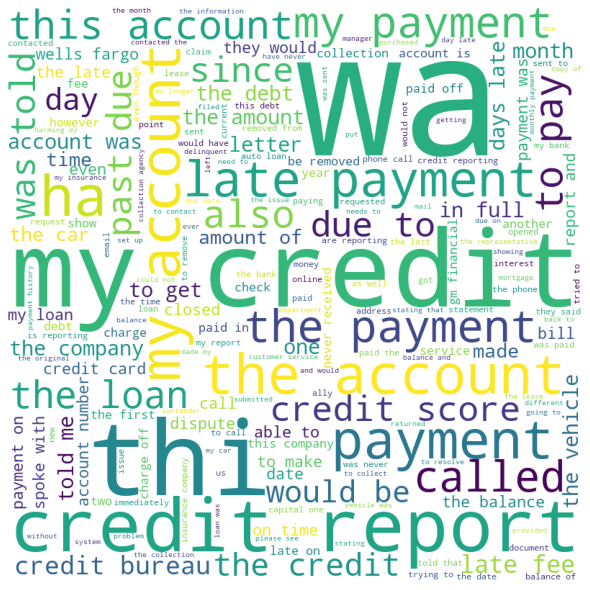

Cluster number: 2
on  i received a notification from my budgeting app advising that my pnc account was no longer linked and i would need to contact my bank to authorize the access. i contacted pnc around . i explained the circumstances and the gentleman advised pnc recently updated their security settings on  which prevents third party apps from accessing the bank account system without an authorization from the owner which is completed thru a text verification process i inquired about how consumers were notified of the new security measure put into place and the rep advised i should receive the notice via mail this week. as of today i still have not received any notification i explained to the gentleman the app i have linked to my pnc monitors my spending with the linked accounts instantly credits my account when it is a possibility an account could go into an overdrawn status. i recently enrolled into overdraft coverage with pnc to ensure my transactions process when using my card an

my card was closed on a 0.00 balance. now wellsfargo credit card attempt to collect 200.00 on a purchase that was disputed and resulted before my card was closed.

made a purchase of a laptop and a phone at best buy in for 2000.00 . i was given an option to either pay for the purchase and receive a discount or put the purchase on the new best buy card issued and serviced by citibank and forego the discount in place of a waived interest rate on the card for a year. i chose to apply for the card. was approved on the spot and put the purchase on it. i have serviced the outstanding balance with regular monthly payments and the outstanding balance as of was 1600.00 . then my wife received a bill in for 2200.00 which included an insterest of 600.00 . i was away on a business trip thought such a huge interest charge was some kind of mistake and i would deal with it upon my return. when i returned to us and cleed the citibank i was explained that the promotion on the card ended and the interes

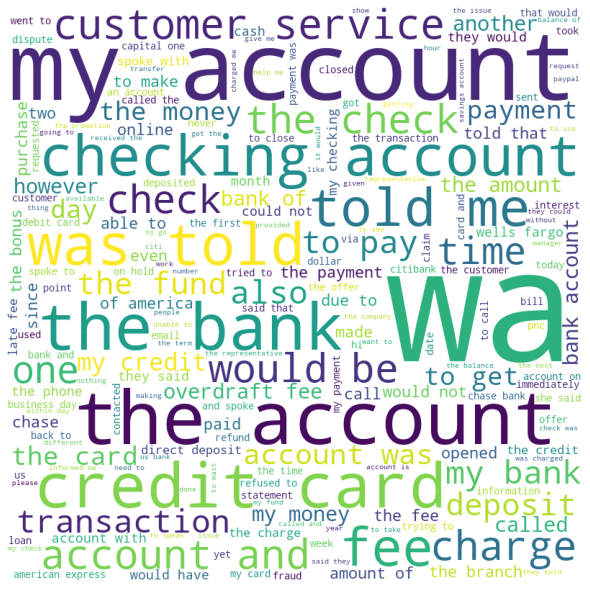

Cluster number: 3
i mail a certified signature letter on xx/xx/ regarding santander consumer to alleged validate the debt i owe request a auction sale receipt and . santander received it on xx/xx/ sign by . you clearly stated you received a letter on . which is incorrect and misleading. the return receipt a copy of which i enclosed was signed on xx/xx/ by . so how did you receive a dispute letter on xx/xx/ when i have proof of it being sign on xx/xx/ by you stated you took repossession of the vehicle at on xx/xx/ at ga where i live. so how is mail going to ga when clearly thats not where i lived nor never live. georgia code section 10-1-36 the lender must notify you of your rights to redeem the car within 10 days of repossession which santander consumer usa failed to do. never send anything certified mail of date time and location of sale to my address at ga where the repossession took place. santander consumer usa failed to send required notices follow certain ga rules so my attorneys

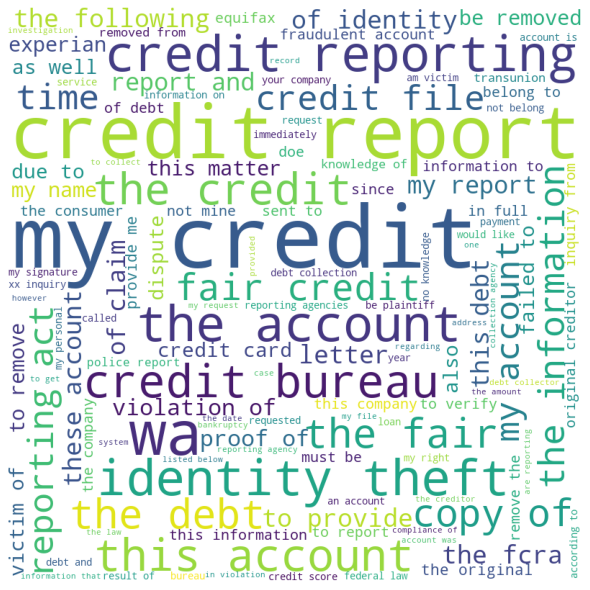

Cluster number: 4
we agreed on a payment amount and they started increasing the amount due outrageously and would not send me any documentation to justify the increased balance. which increased every week significantly

my husband soon to be ex husband ran out on my daughter and i leaving behind tons of bill s including a truck that he had to have sign for. he ran out on charges and left us assuming with nothing for to many addictions and now i haven t worked in 5 years and i have been searching for a job but lack of history skills me. i wanted to trade in for lower he raised it and now is finance responsible after cheating having another baby and a bunch of other messes he will be having. like the 2 domestic violence charges he will be facing. what can i do . 

lobel repossessed the car that wasnt mine from the start i paid only on the car the dealer lied about my address because thats who got the tags and got my application excepted i didnt have to put down on the car the loan date w

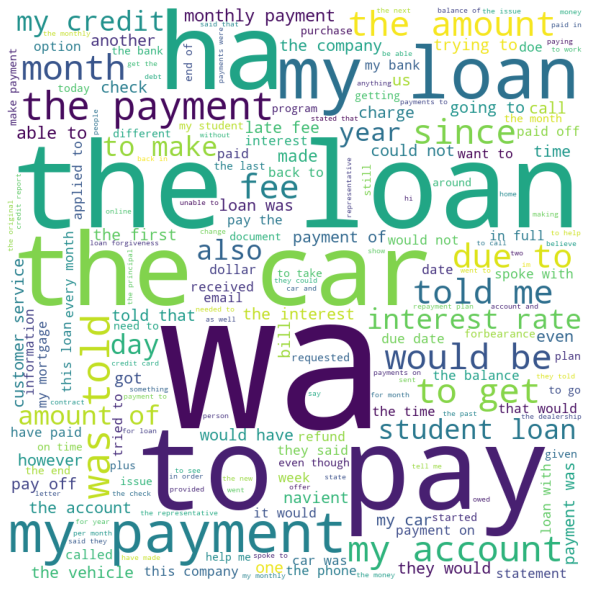

Cluster number: 5
i opened an account with coinbase to buy cryptocurrency last month. i invested and deposited around in the coinbase exchange and in xx/xx/ coinbase blocked my account and asked for some bank statement and id card for verification. its now almost two weeks and my account is still blocked and i have no access to my hard earned money which is stuck in their account. i called them 16 times and they keep telling me to wait. i have kids and have to run my personal expenses but i can not as my money is locked in their system and i have no way of getting my money back from coinbase .i am loosing money everyday because the trade i did is now hanging in coinbase with me no access to my account. please help.

this is related to paypal dispute case . i purchased a product manufactured by from a vendor through their website on  and was provided a confirmation email with order number . i tried contacting them a couple of times via email to ask for an update on when the product woul

on  a guy called who was working for me helping in a construction job stole from my checking book that i kept in may car a blank check and he filled with his letter and signed coping my letter and sign from a check that a gave to him as a payment for his job. he cached a check in a bank call and my bank bank of america pay the money from my checking account dollars . when that happened i went to the bank and put a claim and i reported to the police. the first claim was denied and i do 2 more claims to the bank and they denied again in the first claims they said that i gave the check and in the last one they realized that it is a fraud but they said that somebody has access to the account. now the bank closet the case and dont refund my money that is the bank responsibility.

my mother sent me funds from her account to my account via through chase bank. both her and i both bank with chase. our accounts are also linked together. she sent me via and chase stopped the fund transaction and 

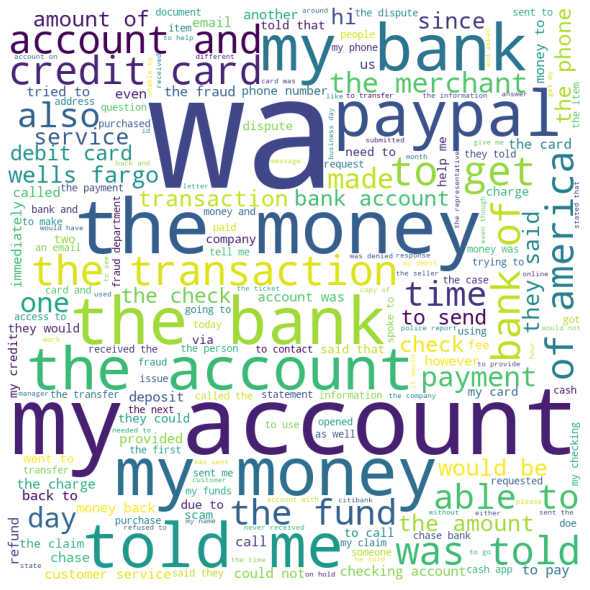

Cluster number: 6
i sent in some more information is the money was i won forced me to send of it to the irs for taxes. i had to sign to do so or it would be seized. so i did do.the irs never received it. that left me to us bank on the other file did start that file and did sue in the case and sued trump i believe with my tax money and no authority from me to use it. i

i was contacted by a " courier service telling me they needed to serve me with papers for check fraud and other offenses. also contacted 2 of my family members and told them i put them down as references which i did not. when i called back they sent me to amercian credit financial llc. they told me the only option i had was to pay them in full or a 300.00 down payment and 100.00 a pay check or i would be arrested. i mistakenly set up a payment arangement but all of the paper work they have sent me doesnt seem legit.

four months ago i took out a payday loan for 500.00 from amplify . i have paid 170.00 every month until i

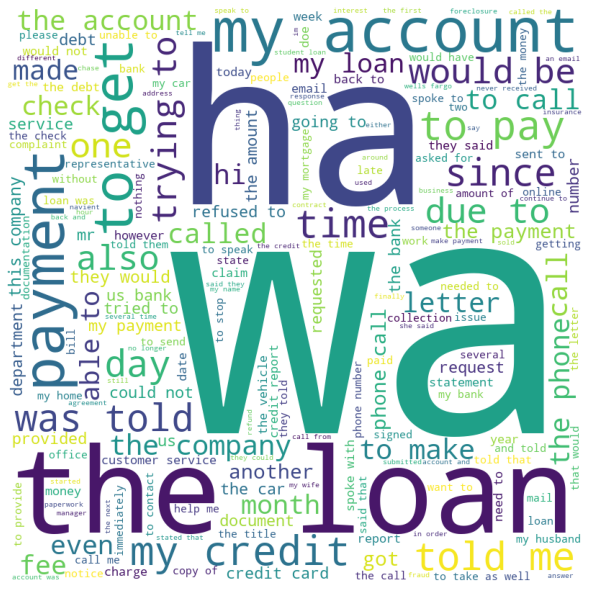

In [11]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import random

#if it's your first time running with these stopwords, run the following line aswell:
#nltk.download('stopwords')

stopwords = set(stopwords.words('english'))
stopwords.add('xx')

for i in range(0,number_clusters):
    all_words = ''
    print('Cluster number: '+str(i))
    amount = 0
    for index, row in df_result.iterrows():
        if row[0] == i:
            all_words += ' ' + row['Consumer complaint narrative']
            rand = random.randint(1,200)
            amount += 1
            if(rand == 1):
                print(row['Consumer complaint narrative'] + '\n')
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_words) 
    print('Number of entries: ' + str(amount))
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 


## Visualizing clusters

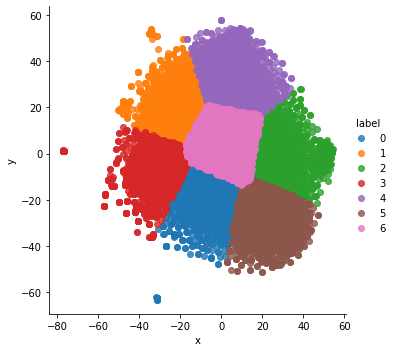

In [12]:
import seaborn as sns
_labels = pd.DataFrame(indexes)
labels = _labels.rename(columns={0: 'label'}) 

_reduced = pd.DataFrame(data_reduced)
reduced = _reduced.rename(columns={0: 'x', 1: 'y'}) 

clusters = pd.concat([reduced, labels], axis = 1)


facet = sns.lmplot(data=clusters, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)
